## Data Science Projects for Business - Final Project
# Car Price Prediction Model
Eliott Vacher Detournière | Julius Walkenhorst

In [15]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Load the dataset
df_train = pd.read_csv('data/train.csv')

In [17]:
# Lowecase the column names and replace spaces with underscores
df_train.columns = (
    df_train.columns
    .str.lower()
    .str.strip()
    .str.replace(".", "", regex=False)
    .str.replace(" ", "_")
)

df_train.drop(columns=['levy'], inplace=True)

In [18]:
# Separate categorical and continuous features

cont_features = [
    'prod_year',
    'engine_volume',
    'mileage',
    'airbags'
]

cat_features = [
    'manufacturer',
    'model',
    'prod_year',
    'category',
    'leather_interior',
    'fuel_type',
    'gear_box_type',
    'drive_wheels',
    'doors',
    'wheel',
    'color'
]

In [19]:
cat_features_plot = [
    'manufacturer',
    'prod_year',
    'category',
    'leather_interior',
    'fuel_type',
    'gear_box_type',
    'drive_wheels',
    'cylinders',
    'doors',
    'wheel',
    'color'
]
# for feature in cat_features_plot:
#     df[feature].value_counts().plot(kind='bar', title=f'Frequency for {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.minorticks_on()
#     plt.grid(which='both', axis='y', linestyle='--', linewidth=0.5)
#     plt.show()

## Data cleaning and preprocessing

In [20]:
# Preprocess the data

# manufacturer: lowercase and encode
df_train['manufacturer'] = df_train['manufacturer'].str.lower().astype('category').cat.codes

# model: lowercase and encode
df_train['model'] = df_train['model'].str.lower().astype('category').cat.codes

# category: drop rows with limousines and encode
# df = df[df['category'].str.lower() != 'limousine']
df_train['category'] = df_train['category'].astype('category').cat.codes

# leather_interior: encode
df_train['leather_interior'] = df_train['leather_interior'].astype('category').cat.codes

# fuel_type: encode
df_train['fuel_type'] = df_train['fuel_type'].astype('category').cat.codes

# engine_volume: extract "Turbo" flag as a categorical feature and convert volume to float
df_train['turbo'] = df_train['engine_volume'].astype(str).str.contains('Turbo', case=False, na=False).astype(int)
df_train['engine_volume'] = df_train['engine_volume'].astype(str).str.replace('Turbo', '', case=False, regex=False).astype(float)

# mileage: remove " km" and convert to float
df_train['mileage'] = df_train['mileage'].astype(str).str.replace(' km', '', regex=False).astype(float)

# cylinders: turn to int
df_train['cylinders'] = df_train['cylinders'].astype(int)

# gear_box_type: encode
df_train['gear_box_type'] = df_train['gear_box_type'].astype('category').cat.codes

# drive_wheels: encode
df_train['drive_wheels'] = df_train['drive_wheels'].astype('category').cat.codes
# doors: encode
df_train['doors'] = df_train['doors'].astype('category').cat.codes

# wheel: encode
df_train['wheel'] = df_train['wheel'].astype('category').cat.codes

# color: encode
df_train['color'] = df_train['color'].astype('category').cat.codes

# airbags: ensure it's int
df_train['airbags'] = df_train['airbags'].astype(int)

In [ ]:
# Detect outliers in df['mileage'] using the IQR method

q1 = df_train['mileage'].quantile(0.25)
q3 = df_train['mileage'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers_mileage = df_train[(df_train['mileage'] < lower_bound) | (df_train['mileage'] > upper_bound)]
print("Number of outliers in mileage:", outliers_mileage.shape[0])
print(outliers_mileage[['mileage']])

# Optionally, visualize using a boxplot
plt.figure(figsize=(8, 4))
plt.boxplot(df_train['mileage'], vert=False)
plt.title("Boxplot of Mileage")
plt.xlabel("Mileage")
plt.show()

# Drop outliers
df_train = df_train[(df_train['mileage'] <= upper_bound)]
print("Shape of df after dropping mileage outliers:", df_train.shape)


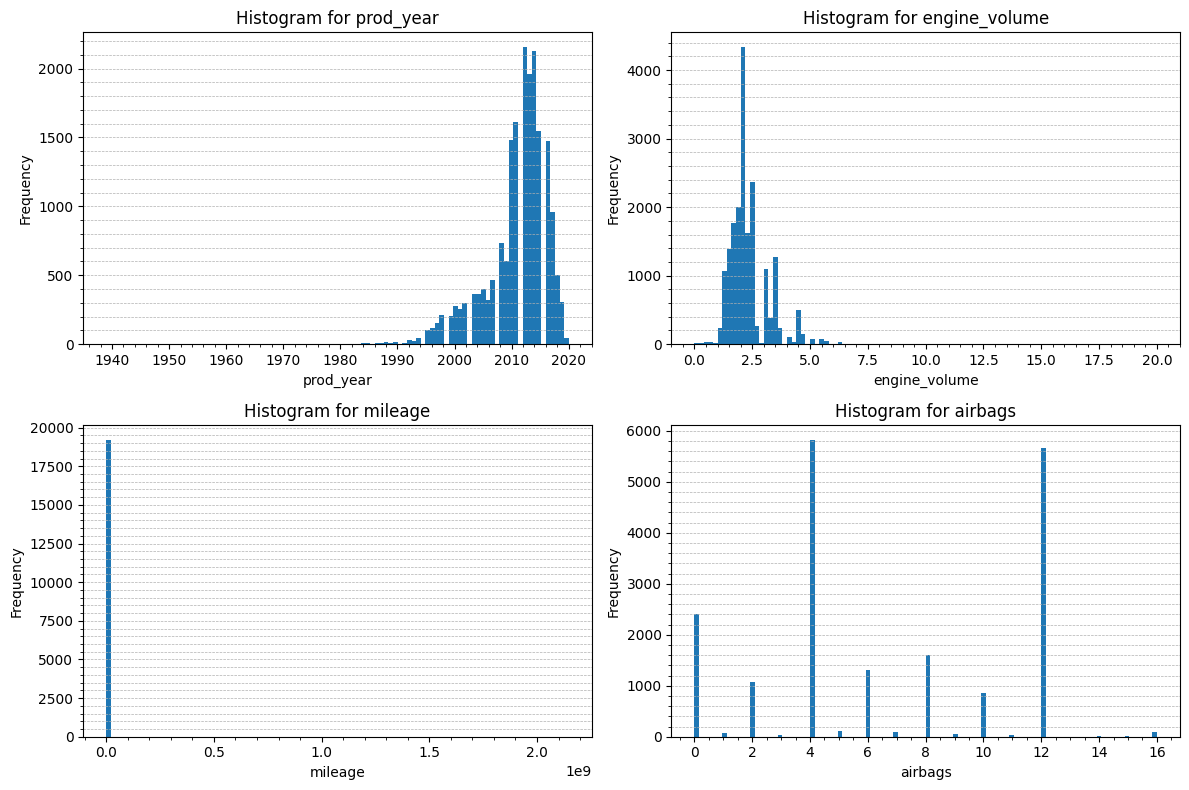

In [ ]:
# Plot histograms for continuous features

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

for i, feature in enumerate(cont_features):
    axs[i].hist(df_train[feature], bins=100)
    axs[i].set_title(f'Histogram for {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
    axs[i].minorticks_on()
    axs[i].grid(which='both', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

## Feature Importance

In [ ]:


features = df_train.drop(columns=['price', 'id', 'wheel'])
target = df_train['price']

             feature  importance
7            mileage    0.298247
2          prod_year    0.192697
6      engine_volume    0.127946
0       manufacturer    0.061371
3           category    0.056510
13           airbags    0.053147
5          fuel_type    0.049039
14             turbo    0.043087
1              model    0.042109
9      gear_box_type    0.027774
8          cylinders    0.016591
12             color    0.013240
10      drive_wheels    0.010701
4   leather_interior    0.004825
11             doors    0.002716


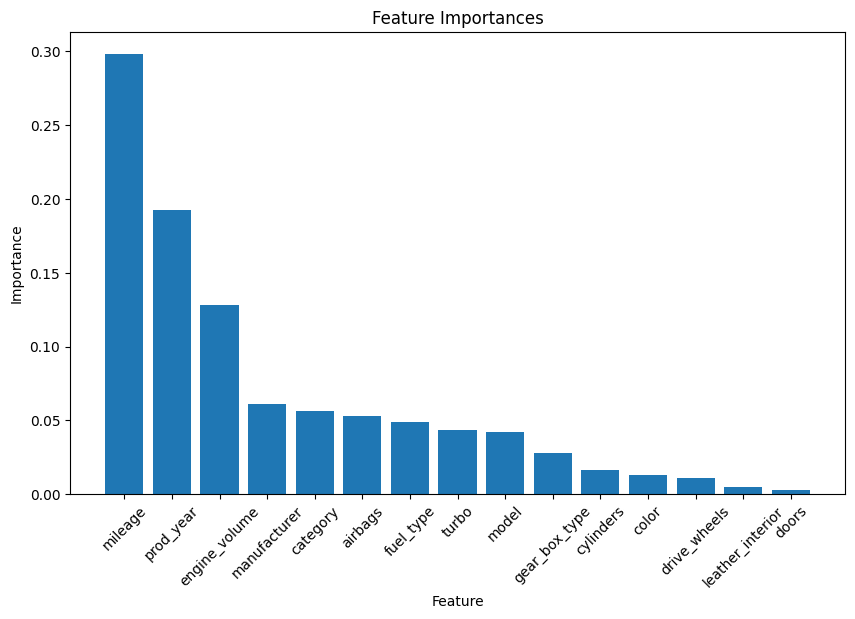

Model Performance Metrics:
Mean Absolute Error: 8184.911127574794
Mean Squared Error: 14456909469.394697
Root Mean Squared Error: 120236.88897087573
R^2 Score: -45.39623406737216


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare data: use `features` as predictors and df_train['price'] as target
X = features
y = target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances and display as a dataframe
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.show()

# Compute model performance metrics
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Correlation matrix for continuous features:
               prod_year  engine_volume   mileage   airbags
prod_year       1.000000      -0.030906 -0.063501  0.236969
engine_volume  -0.030906       1.000000 -0.006289  0.224441
mileage        -0.063501      -0.006289  1.000000 -0.009201
airbags         0.236969       0.224441 -0.009201  1.000000


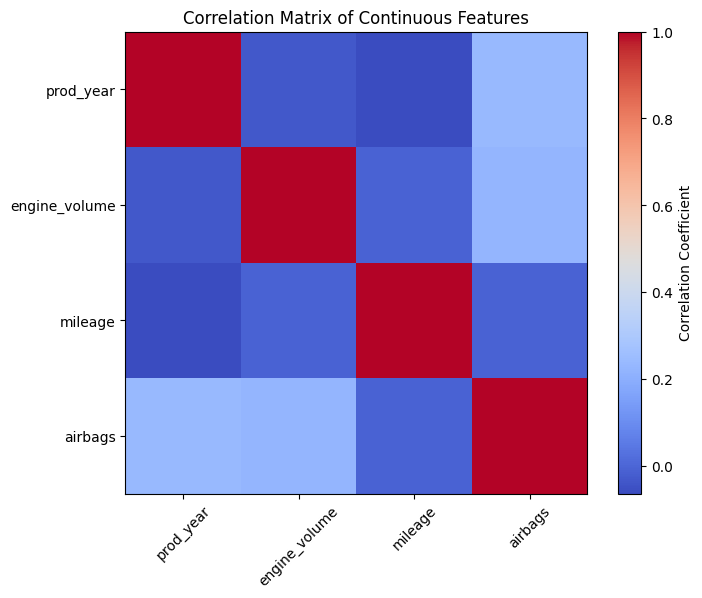

In [25]:
# Compute the correlation matrix for continuous features
corr_matrix = df_train[cont_features].corr()
print("Correlation matrix for continuous features:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(cont_features)), cont_features, rotation=45)
plt.yticks(range(len(cont_features)), cont_features)
plt.title('Correlation Matrix of Continuous Features')
plt.show()

## Model Development

In [26]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

rand_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

rand_search.fit(X, target)

print("Best parameters found:", rand_search.best_params_)
print("Best CV MSE:", -rand_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best CV MSE: 37211630528.643074


<Axes: title={'center': 'Histogram of Price'}, ylabel='Frequency'>

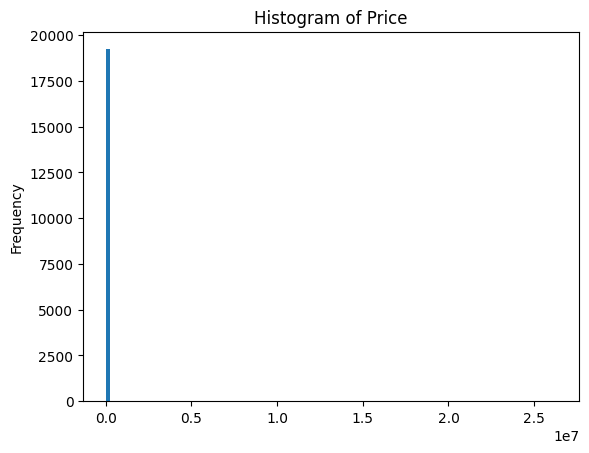

In [27]:
target.plot(kind='hist', bins=100, title='Histogram of Price')